### Imports

In [1]:
%matplotlib notebook
import time
#import multiprocessing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import geo.caustic_frame as caustic_frame
import monte_carlo_simulation as mcs
from bandstructure.delafossite_bandstructure import delafossite
from matplotlib.animation import FuncAnimation

### Simulation

In [2]:
k = delafossite()
bar_frame = caustic_frame.Frame('geo/bar.dxf')
field = 10.0
phi = 0
n_inject = 1
np.random.seed(42)
bar_sim = mcs.Simulation(bar_frame, k, phi, field, 0)
edge_to_collisions, trajectories = bar_sim.run_simulation(n_inject)
print(f'{field:.1f} T: {list(map(len, trajectories))}')

10.0 T: [3811]


### Animation

<IPython.core.display.Javascript object>


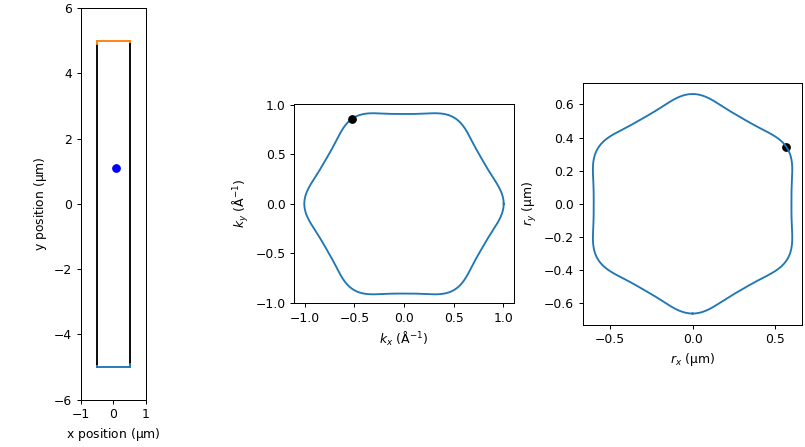

In [3]:
FRAME_SKIP = 3
trajectory = trajectories[0]
ns, xs, ys, state, edge = zip(*trajectory)

plt.rcParams['figure.figsize'] = [9, 5]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, constrained_layout=True)

plt.subplot(1, 3, 1)
ax1.set_xlim(-1, 1)
ax1.set_ylim(-6, 6)
for edge in bar_frame.edges:
    x, y = [edge.xs, edge.ys]
    if edge.layer == 0:
        plt.plot(x, y, color='k')
    else:
        plt.plot(x, y, color='C'+str(edge.layer-1))
plt.xlabel(r'x position ($\mathrm{\mu m}$)')
plt.ylabel(r'y position ($\mathrm{\mu m}$)')
line1, = ax1.plot([], [], 'bo')
ax1.set_aspect('equal')

plt.subplot(1, 3, 2)
plt.plot(k[0], k[1])
plt.xlabel(r'$k_x\ (\mathrm{\AA^{-1}})$')
plt.ylabel(r'$k_y\ (\mathrm{\AA^{-1}})$')
line2, = ax2.plot([], [], color='black', linestyle='dashdot', marker='o')
ax2.set_aspect('equal')

plt.subplot(1, 3, 3)
line3, = ax3.plot([], [], color='black', linestyle='dashdot', marker='o')
plt.plot(bar_sim._bandstructure.r[0], bar_sim._bandstructure.r[1])
plt.xlabel(r'$r_x\ (\mathrm{\mu m})$')
plt.ylabel(r'$r_y\ (\mathrm{\mu m})$')
ax3.set_aspect('equal')

def animate(frame_num):
    frame_num_adapted = frame_num*FRAME_SKIP
    line1.set_data((xs[frame_num_adapted], ys[frame_num_adapted]))
    line2.set_data(k[0][ns[frame_num_adapted][0]], k[1][ns[frame_num_adapted][0]])
    line3.set_data(bar_sim._bandstructure.r[0][ns[frame_num_adapted][0]], bar_sim._bandstructure.r[1][ns[frame_num_adapted][0]])

anim = FuncAnimation(fig, animate, frames=int(len(xs)/FRAME_SKIP), interval=15)
plt.show()
